In [1]:
import pandas as pd
prices_df = pd.read_csv("KMEANCLUS.csv")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [25]:
returns = prices_df.pct_change().mean() * 252
returns = pd.DataFrame(returns)

In [26]:
from math import *
returns.columns = ['Returns']
returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)

In [27]:
import numpy as np
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [28]:
cleaned_data = np.where(np.isnan(data), 0, data)

In [29]:
from sklearn.cluster import KMeans

In [30]:
X = cleaned_data


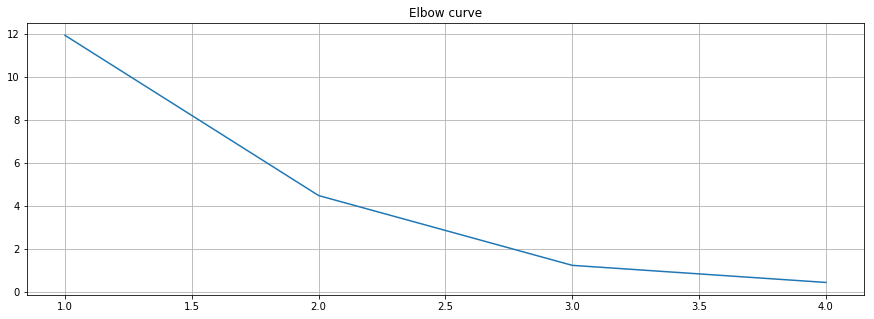

In [31]:
wcss = []
for k in range(1, 5):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
    
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 5), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [32]:
centroids,_ = kmeans(cleaned_data,5)
# assign each sample to a cluster
idx,_ = vq(cleaned_data,centroids)
data = cleaned_data

In [33]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

In [34]:
labels =['Stock Symbol', 'Cluster']
df = pd.DataFrame.from_records(details, columns=labels)
df.head(n=15)

,Stock Symbol,Cluster
0,AAPL,1
1,AMZN,4
2,AVGO,1
3,CSCO,0
4,FB,2
5,HD,0
6,MSFT,2
7,MU,3
8,NVDA,2
9,WMT,2
